In [86]:
import numpy as np
import random

11.1
  Sa se genereza variabila Beta(0.75, 4) prin doua metode - curs 6

 **Metoda 1:**

    X1 ~ Gama(0,1,a) si X2 ~ Gama(0,1,b) doua variabile independente
            X= X1/(X1+X2) este variabila Beta(a,b)

  **Metoda 2:**

    Fie 0<a<1, b>1 si U1, U2 variabile aleatoare uniforme pe [0,1] independente.
    Daca V=U1^(1/a) si T=U2^(1/(b-1)) atunci repartitia variabilei V conditionata de V+T<1 este Beta(a,b)
    


In [87]:
def beta1(a,b):
  X1=random.gammavariate(a,1)
  #print(X1)
  X2=random.gammavariate(b,1)
  X=X1/(X1+X2)
  return X

def beta2(a,b):
  while True:
    U1=random.uniform(0,1)
    U2=random.uniform(0,1)
    V=U1**(1/a)
    T=U2**(1/(b-1))
    if V+T<1:
      return V

In [88]:
a=0.75
b=4
B1=beta1(a,b)
B2=beta2(a,b)

print(f"Beta1={B1}")
print(f"Beta2={B2}")

Beta1=0.7046173191736619
Beta2=0.3243489700287594


Validarea cu media si dispersia de selectie

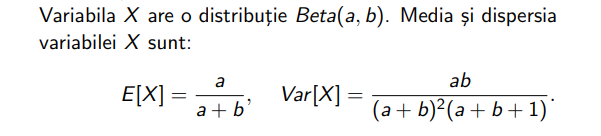

In [89]:
actual_mean=a/(a+b)
actual_disp= (a*b)/(((a+b)**2)*(a+b+1))
print(f"actual mean={actual_mean}    actual disp={actual_disp}")

actual mean=0.15789473684210525    actual disp=0.023124171986029146


In [90]:
sample_beta1=[beta1(a,b) for _ in range(1000)]
sample_beta2=[beta2(a,b) for _ in range(1000)]
mean_s1, mean_s2= np.mean(sample_beta1), np.mean(sample_beta2)
disp_s1,disp_s2=np.std(sample_beta1), np.std(sample_beta2)

print(f"First sample expected: mean = {mean_s1}  disp = {disp_s1}")
print(f"Second sample expected: mean = {mean_s2}  disp = {disp_s2}")

First sample expected: mean = 0.15796072612598364  disp = 0.14408625609468773
Second sample expected: mean = 0.14892200791068622  disp = 0.14457638417575158


11.2 Sa se genereze variabila hipergeometrica cu parametrii cititi de la tastatura - curs 7
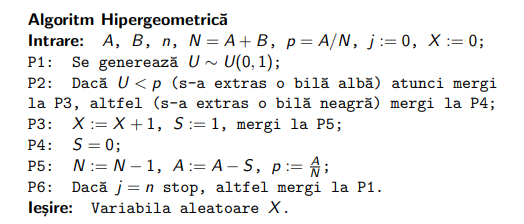

In [91]:
def var_hipergeom(A,B,n):
  N=A+B
  p=A/N
  count=0
  X=0
  while count<n:
    U=random.uniform(0,1)
    if(U<p):
      X+=1
      S=1
    else:
      S=0
    N-=1
    A=A-S
    if N>0:
      p=A/N
    count+=1
  return X

In [92]:
A=int(input("A="))
B=int(input("B="))
n=10
hyper=var_hipergeom(A,B,n)
print(hyper)

A=33
B=12
7


Validarea cu media si dispersia de selectie

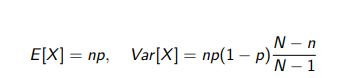

In [93]:
p=A/(A+B)
N=A+B
actual_mean=n*p
actual_disp=n*p*(1-p)*(N-n)/(N-1)
print(f"actual mean={actual_mean}    actual disp={actual_disp}")

actual mean=7.333333333333333    actual disp=1.5555555555555558


In [94]:
sample_hyper=[var_hipergeom(A,B,n) for _ in range(1000)]
exp_mean= np.mean(sample_hyper)
exp_disp=np.std(sample_hyper)

print(f"expected mean={exp_mean}    expected disp={exp_disp}")

expected mean=7.369    expected disp=1.2028462079584405
